# Training the machine learning model based on the readings

Trained model saved as 'battery_level_prediction_model.joblib'
Mean Squared Error: 0.008623275772295021


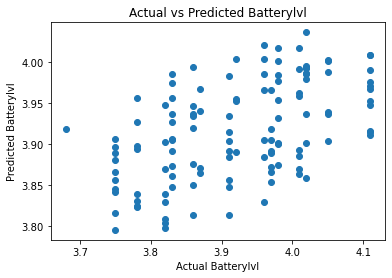

In [2]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your CSV file
file_path = 'All_range_data_1.csv'
data = pd.read_csv(file_path)

# Extract features (Speed, Reading) and target variable (Batterylvl)
X = data[['Speed', 'Reading']]
y = data['Batterylvl']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Assuming 'model' is your trained Linear Regression model
model_filename = 'battery_level_prediction_model.joblib'
joblib.dump(model, model_filename)
print(f"Trained model saved as '{model_filename}'")

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Batterylvl')
plt.ylabel('Predicted Batterylvl')
plt.title('Actual vs Predicted Batterylvl')
plt.show()

# Getting the output from the trained machine learning model\

In [26]:
import joblib

def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

# Load the trained model
model_filename = 'battery_level_prediction_model.joblib'
loaded_model = joblib.load(model_filename)

# Now, you can use the loaded model to make predictions for new data
new_data = pd.DataFrame({'Speed': [1000], 'Reading': [3.90]})
predicted_battery_level = loaded_model.predict(new_data)

#Showing the battery percentage level
percentage = translate(predicted_battery_level[0],3.7,4.2,0,100)
print(f'Predicted Batterylvl for given Speed and Reading: {percentage}%')

Predicted Batterylvl for given Speed and Reading: 91.16256111951967%
